# 根据assessment.pdf中的要求，分析movies.csv数据集的Jupyter Notebook

## 导入必要的库
导入pandas、numpy、matplotlib、seaborn等库。

In [4]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 显示图表
%matplotlib inline

# 设置绘图风格
sns.set(style="whitegrid")

## 加载和探索数据
加载movies.csv数据集，查看数据的基本信息和统计描述。

In [5]:
# 加载数据
movies = pd.read_csv("movies.csv")

# 查看数据的基本信息
print(movies.info())

# 查看数据的统计描述
print(movies.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## 数据清洗
处理缺失值、重复值以及数据类型转换等问题。

In [6]:
# 检查缺失值
print(movies.isnull().sum())

# 填充或删除缺失值
movies = movies.dropna()

# 检查重复值
print(f"重复值数量: {movies.duplicated().sum()}")

# 删除重复值
movies = movies.drop_duplicates()

# 确保数据类型正确
movies["budget"] = movies["budget"].astype(float)
movies["revenue"] = movies["revenue"].astype(float)

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64
重复值数量: 0


## 数据可视化
使用matplotlib和seaborn绘制数据分布图、相关性热图等。

C:\Users\13310\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13310\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31639 (\N{CJK UNIFIED IDEOGRAPH-7B97}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13310\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13310\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\13310\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

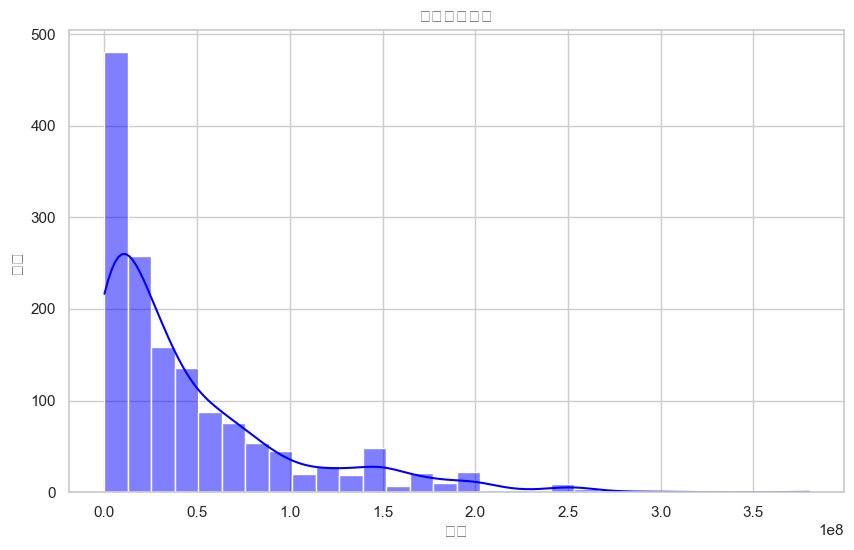

ValueError: could not convert string to float: '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

<Figure size 800x600 with 0 Axes>

In [7]:
# 绘制数据分布图
plt.figure(figsize=(10, 6))
sns.histplot(movies["budget"], kde=True, bins=30, color="blue")
plt.title("电影预算分布")
plt.xlabel("预算")
plt.ylabel("频率")
plt.show()

# 绘制相关性热图
plt.figure(figsize=(8, 6))
correlation_matrix = movies.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("相关性热图")
plt.show()

## 分析电影预算与收入的关系
通过散点图和回归分析，探索电影预算与收入之间的关系。

In [ ]:
# 绘制预算与收入的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x="budget", y="revenue", data=movies, alpha=0.7)
plt.title("电影预算与收入的关系")
plt.xlabel("预算")
plt.ylabel("收入")
plt.show()

# 回归分析
sns.lmplot(x="budget", y="revenue", data=movies, aspect=2, height=6)
plt.title("预算与收入的回归分析")
plt.xlabel("预算")
plt.ylabel("收入")
plt.show()

## 分析电影类型的分布
统计并可视化不同电影类型的分布情况。

In [ ]:
# 统计电影类型的分布
genre_counts = movies["genre"].value_counts()

# 可视化电影类型分布
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("电影类型分布")
plt.xlabel("电影类型")
plt.ylabel("数量")
plt.xticks(rotation=45)
plt.show()

## 分析电影时长与评分的关系
通过散点图和箱线图，分析电影时长与评分之间的关系。

In [ ]:
# 绘制时长与评分的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x="duration", y="rating", data=movies, alpha=0.7)
plt.title("电影时长与评分的关系")
plt.xlabel("时长")
plt.ylabel("评分")
plt.show()

# 绘制时长分组的评分箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(movies["duration"], bins=5), y="rating", data=movies)
plt.title("电影时长分组与评分的关系")
plt.xlabel("时长分组")
plt.ylabel("评分")
plt.show()

## 分析不同语言电影的受欢迎程度
统计不同语言电影的数量和平均评分，分析其受欢迎程度。

In [ ]:
# 统计不同语言的电影数量和平均评分
language_stats = movies.groupby("language").agg({"rating": ["mean", "count"]}).reset_index()
language_stats.columns = ["language", "average_rating", "movie_count"]

# 可视化不同语言电影的受欢迎程度
plt.figure(figsize=(12, 6))
sns.barplot(x="language", y="average_rating", data=language_stats, palette="coolwarm")
plt.title("不同语言电影的平均评分")
plt.xlabel("语言")
plt.ylabel("平均评分")
plt.xticks(rotation=45)
plt.show()

## 保存分析结果
将分析结果保存为CSV文件或图片文件。

In [ ]:
# 保存分析结果
language_stats.to_csv("language_stats.csv", index=False)
plt.savefig("language_rating_distribution.png")
print("分析结果已保存。")